In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Introduction
In this Notebook, we will demonstrate:
- The basic steps to apply the KNN techique for classfication on the abalone dataset. 
- To show the result or score we get on the classification task
- Bonus: tuning for parameter $k$

Note that previous results have shown a classification accuracy of around 16% 

### Import the dataset

In [2]:
columns = ['sex', 'length', 'diameter', 'height', 'weight', 'iweight', 'vweight', 'sweight', 'rings']
abalone_data = pd.read_csv('abalone.csv', header=None, names=columns)

# Let's change the sex to a number
abalone_data['sex'] = abalone_data['sex'].map({'M':1,'F':0, 'I':0.5});

abalone_data.tail()

,sex,length,diameter,height,weight,iweight,vweight,sweight,rings
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,1.0,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [3]:
# abalone_data['rings'].value_counts()
# There are categories (number of rings) with very few observations
# Let's keep only those categories with over 100 observations

abalone_subset = abalone_data.groupby("rings").filter(lambda x: len(x) > 100)

abalone_subset['rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: rings, dtype: int64

### Separate the data into features and target

In [4]:
# Define the independent variables as features.
X = abalone_subset.drop('rings', axis=1)
y = abalone_subset['rings']

### Create the classifier, using cross validation

In [5]:
# Use 9 neighbors
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

### Perform the classification

In [6]:
# Use a 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=5)
print ('Mean score is: {0:2.2f}'.format(scores.mean()))

Mean score is: 0.27


## Bonus
Tuning parameter $k$

In [7]:
# a list of values of k
klist = np.arange(3, 32,2)

In [8]:
k_size = klist.size
k_scores = np.zeros(k_size)

for i,k in enumerate(klist):
    knn = KNeighborsClassifier(n_neighbors=k)
    kscore = cross_val_score(knn, X, y, cv=5)
    k_scores[i] = kscore.mean()
    

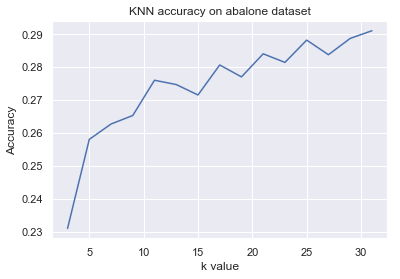

In [9]:
ax = sns.lineplot(klist, k_scores)
ax.set_title('KNN accuracy on abalone dataset')
ax.set_xlabel('k value')
ax.set_ylabel('Accuracy');

### Conclusion
A value of $k > 15$ seems to offer the best accuracy for the this abalone dataset using KNN. For that $k$ value yhe accuracy is much better than the previously reported 16%. 

### Further idea to explore! more preprocessing the data

- Basically, we would like to convert sex of M, F and I something like this. 

Suppose you have:

 | Abalone |  M | F | I |
 |---------|----|---|---|
 | Abalone1 | 1 | 0 | 0 |
 | Abalone2 | 0 | 1 | 0 |
 | Abalone3 | 0 | 0 | 1 |

This would indocate that Abalone1 is Male, Abalone2 is Female and Abalone3 is an Infant. The names of the columns is not really important.
This is referred to as a one-hot encoding. Scikit-lear has this. It is called **OneHotEncoder** in *sklearn.preprocessing*. 
The easiest way is to apply it is to use:

from sklearn.preprocessing import LabelBinarizer

and read the documentation. 

In [10]:
from sklearn.preprocessing import LabelBinarizer

In [11]:
columns = ['sex', 'length', 'diameter', 'height', 'weight', 'iweight', 'vweight', 'sweight', 'rings']
abalone_data = pd.read_csv('abalone.csv', header=None, names=columns)
abalone_subset = abalone_data.groupby("rings").filter(lambda x: len(x) > 100)
# Note that we do not chage the sex to numbers here, they are still categorical data

abalone_subset.reset_index(drop=True, inplace=True)

gender_lb = LabelBinarizer()
genders = pd.DataFrame(gender_lb.fit_transform(abalone_subset['sex'].values), columns=['s1', 's2', 's3'])

mydata = pd.concat([genders, abalone_subset.drop(['sex'],1)], axis=1).reindex()

mydata.tail()

,s1,s2,s3,length,diameter,height,weight,iweight,vweight,sweight,rings
3837,1,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3838,0,0,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3839,0,0,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3840,1,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
3841,0,0,1,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


#### Note that column sex is now 3 different columns

In [12]:
# Define the independent variables as features.
X = mydata.drop('rings', axis=1)
y = mydata['rings']

In [13]:
# Use a 5-fold cross-validation
scores = cross_val_score(knn, X, y, cv=5)
print ('Mean score is: {0:2.2f}'.format(scores.mean()))

Mean score is: 0.29


#### Note that we have increased the accuracy by 2% by this simple change